In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from itertools import combinations
import numpy as np
from humanfriendly import format_size, parse_size

In [3]:
named_colors = {
    "black": "#000000",
    "orange": "#e69f00",
    "skyblue": "#56b4e9",
    "bluish green": "#009e73",
    "yellow": "#f0e442",
    "blue": "#0072b2",
    "vermilion": "#d55e00",
    "reddish purple": "#cc79a7",
}
cud_palette = list(named_colors.values())

In [4]:
sns.set_palette(cud_palette)

In [5]:
df = pd.read_csv("../results/estimates/estimates.tsv", sep="\t")
df["abs_relative_error"] = df["relative_error"].abs()
# replace values of inifinity with NaN
# df = df.replace([float("inf"), float("-inf")], float("nan"))
df

,asm_accession,organism,taxid,bioproject,biosample,strain,asm_seq_tech,n_chromosomes,true_size,asm_coverage,...,method,relative_size,relative_error,cpu_time,memory_mb,stats_num_seqs,stats_sum_len,stats_avg_len,stats_median_len,abs_relative_error
0,GCF_040215695.1,[Arthrobacter] sp. ATCC 21022,1771959,PRJNA1116247,SAMN41528051,ATCC 21022,Illumina;ONT,1,4434229,100.0,...,lrge-ava,1.045089,4.508856,15.64,31.98,348527.0,1.000002e+09,2869.2,1839.0,4.508856
1,GCF_040215695.1,[Arthrobacter] sp. ATCC 21022,1771959,PRJNA1116247,SAMN41528051,ATCC 21022,Illumina;ONT,1,4434229,100.0,...,lrge-2set,1.049315,4.931535,15.61,32.02,348527.0,1.000002e+09,2869.2,1839.0,4.931535
2,GCF_040215695.1,[Arthrobacter] sp. ATCC 21022,1771959,PRJNA1116247,SAMN41528051,ATCC 21022,Illumina;ONT,1,4434229,100.0,...,mash,1.188292,18.829226,15.15,381.71,348527.0,1.000002e+09,2869.2,1839.0,18.829226
3,GCF_040215695.1,[Arthrobacter] sp. ATCC 21022,1771959,PRJNA1116247,SAMN41528051,ATCC 21022,Illumina;ONT,1,4434229,100.0,...,genomescope,0.940622,-5.937763,46.16,8166.59,348527.0,1.000002e+09,2869.2,1839.0,5.937763
4,GCF_016889005.1,[Clostridium] scindens,29347,PRJNA231221,SAMN16357369,FDAARGOS_1227,Illumina;PacBio,1,3619096,1116.1,...,lrge-ava,1.232446,23.244589,20.41,1814.95,134076.0,1.000001e+09,7458.5,7881.0,23.244589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13855,GCF_026183365.1,Yersinia sp. SCPM-O-B-9106 (C-191),2992843,PRJNA269675,SAMN31564381,SCPM-O-B-9106 (C-191),Other;ONT,1,4417639,172.5,...,genomescope,0.946140,-5.385999,20.43,2476.81,47776.0,2.951364e+08,6177.5,1976.0,5.385999
13856,GCF_004353525.1,Zhaonella formicivorans,2528593,PRJNA523471,SAMN10977731,K32,ONT,1,3314304,400.0,...,lrge-ava,1.059135,5.913459,134.43,3019.85,105538.0,1.000004e+09,9475.3,6568.0,5.913459
13857,GCF_004353525.1,Zhaonella formicivorans,2528593,PRJNA523471,SAMN10977731,K32,ONT,1,3314304,400.0,...,lrge-2set,1.048742,4.874228,22.31,29.93,105538.0,1.000004e+09,9475.3,6568.0,4.874228
13858,GCF_004353525.1,Zhaonella formicivorans,2528593,PRJNA523471,SAMN10977731,K32,ONT,1,3314304,400.0,...,mash,2.484603,148.460310,47.44,1449.80,105538.0,1.000004e+09,9475.3,6568.0,148.460310


In [6]:
# check there are no values of infinity
assert not df.isin([float("inf"), float("-inf")]).any().any()

In [7]:
label_mapping = {"OXFORD_NANOPORE": "ONT", "PACBIO_SMRT": "PacBio"}

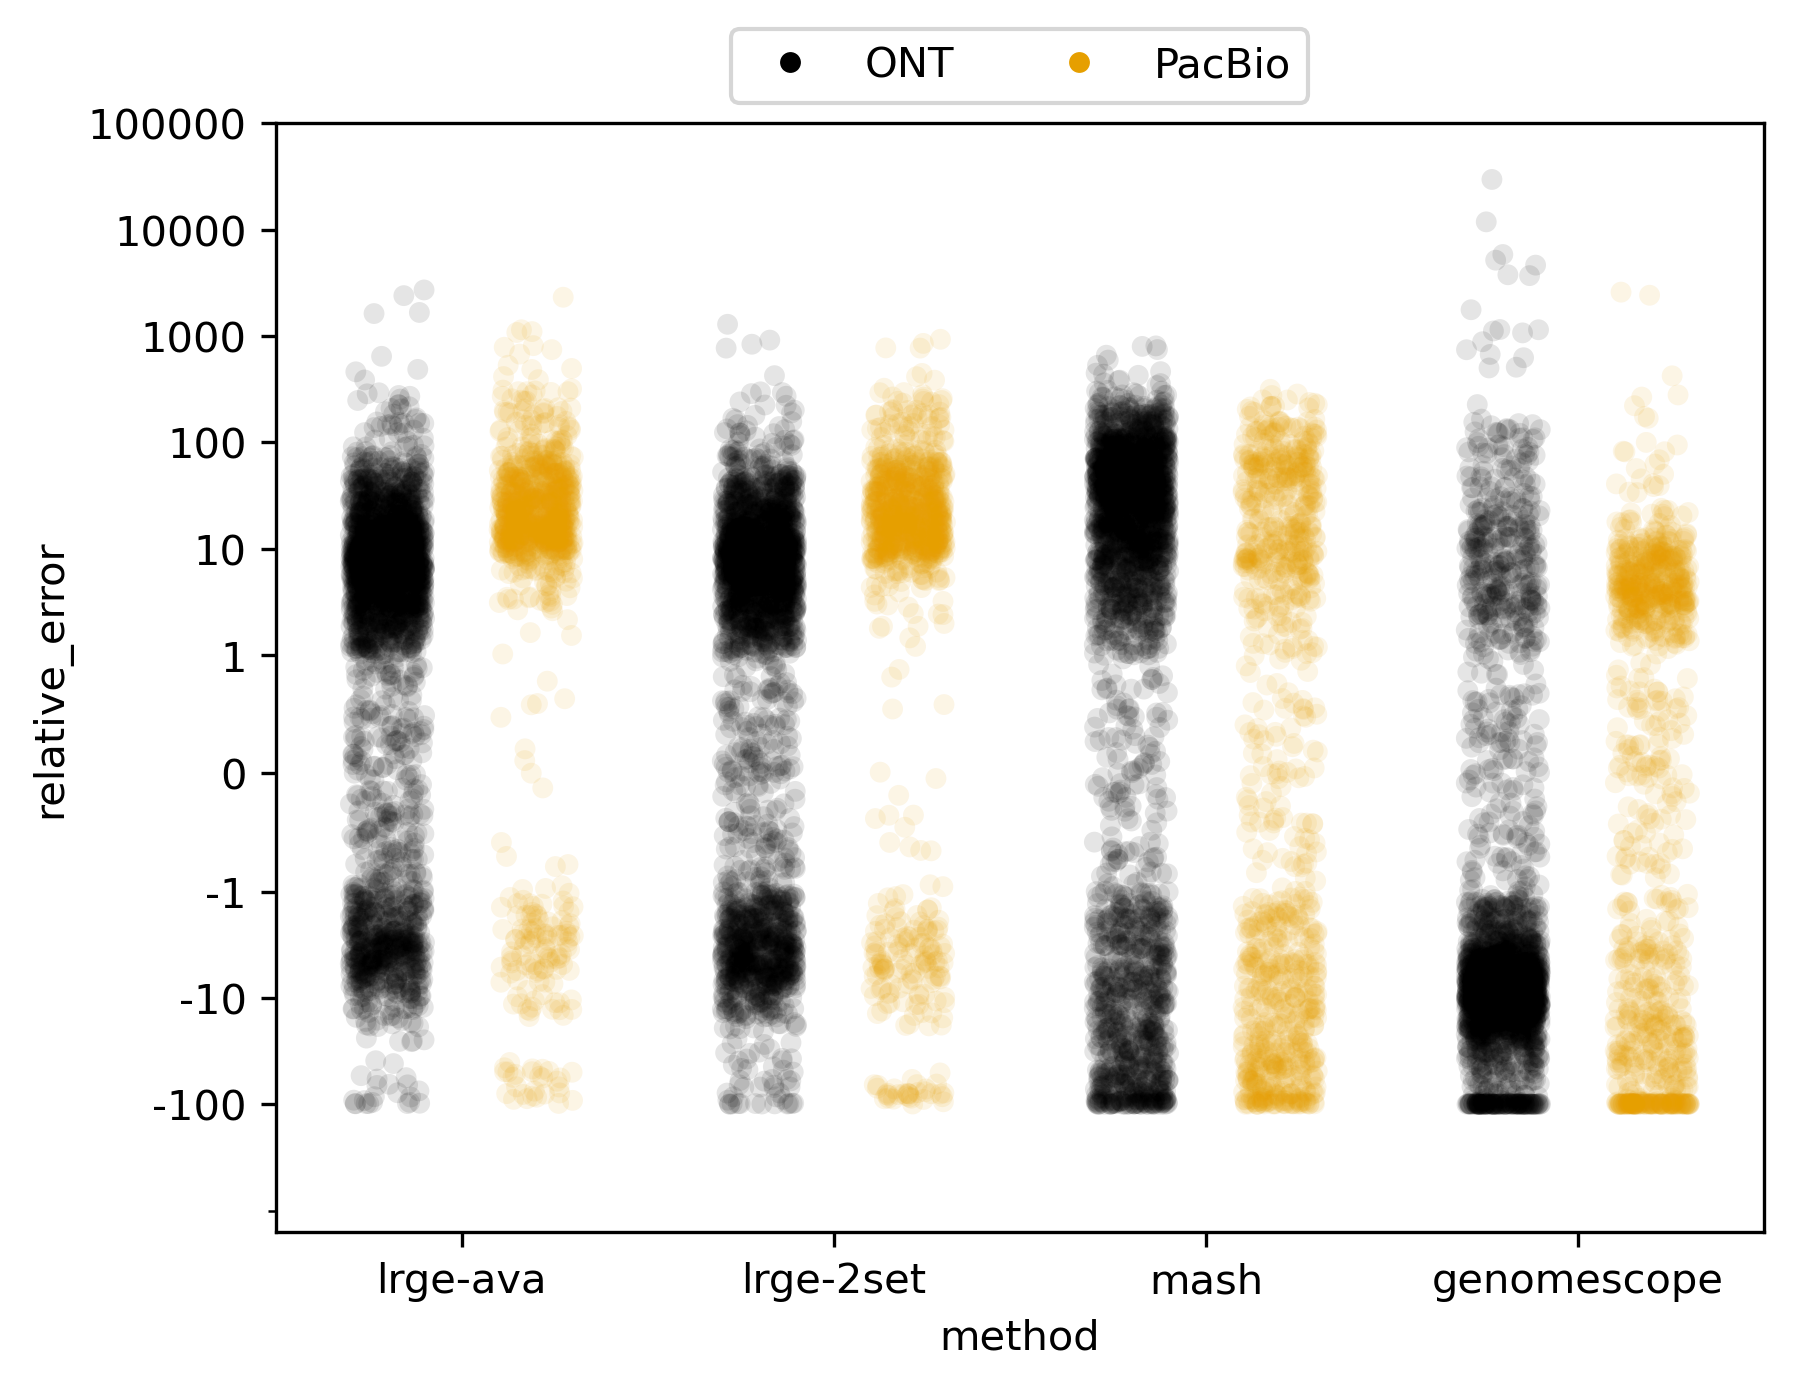

In [8]:
fig, ax = plt.subplots(dpi=300)
x = "method"
y = "relative_error"
hue = "platform"
data = df
# sns.boxplot(x=x, y=y, hue=hue, data=data, ax=ax, fill=False, fliersize=0, gap=0.1)
# sns.violinplot(x=x, y=y, hue=hue, data=data, ax=ax, fill=False, linewidth=1, scale="width")
sns.stripplot(x=x, y=y, hue=hue, data=data, ax=ax, dodge=True, alpha=0.1, jitter=0.2)
ax.set_yscale("symlog", linthresh=1)
yticks = [-100, -10, -1, 0, 1, 10, 100, 1000, 10000, 100000]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

# make the markers larger and less transparent in the legend
handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_markersize(5)
    handle.set_alpha(1)

labels = [label_mapping.get(label, label) for label in labels]

ax.legend(
    handles,
    labels,
    loc="lower center",
    bbox_to_anchor=(0.5, 1),
    ncol=2,
    title="",
    alignment="center",
)

/var/folders/bp/zbbdn_091x1_34h2k7b9nszm0000gn/T/ipykernel_86854/3207729266.py:7: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x=x, y=y, hue=hue, data=data, ax=ax, alpha=0.1, palette=cud_palette)


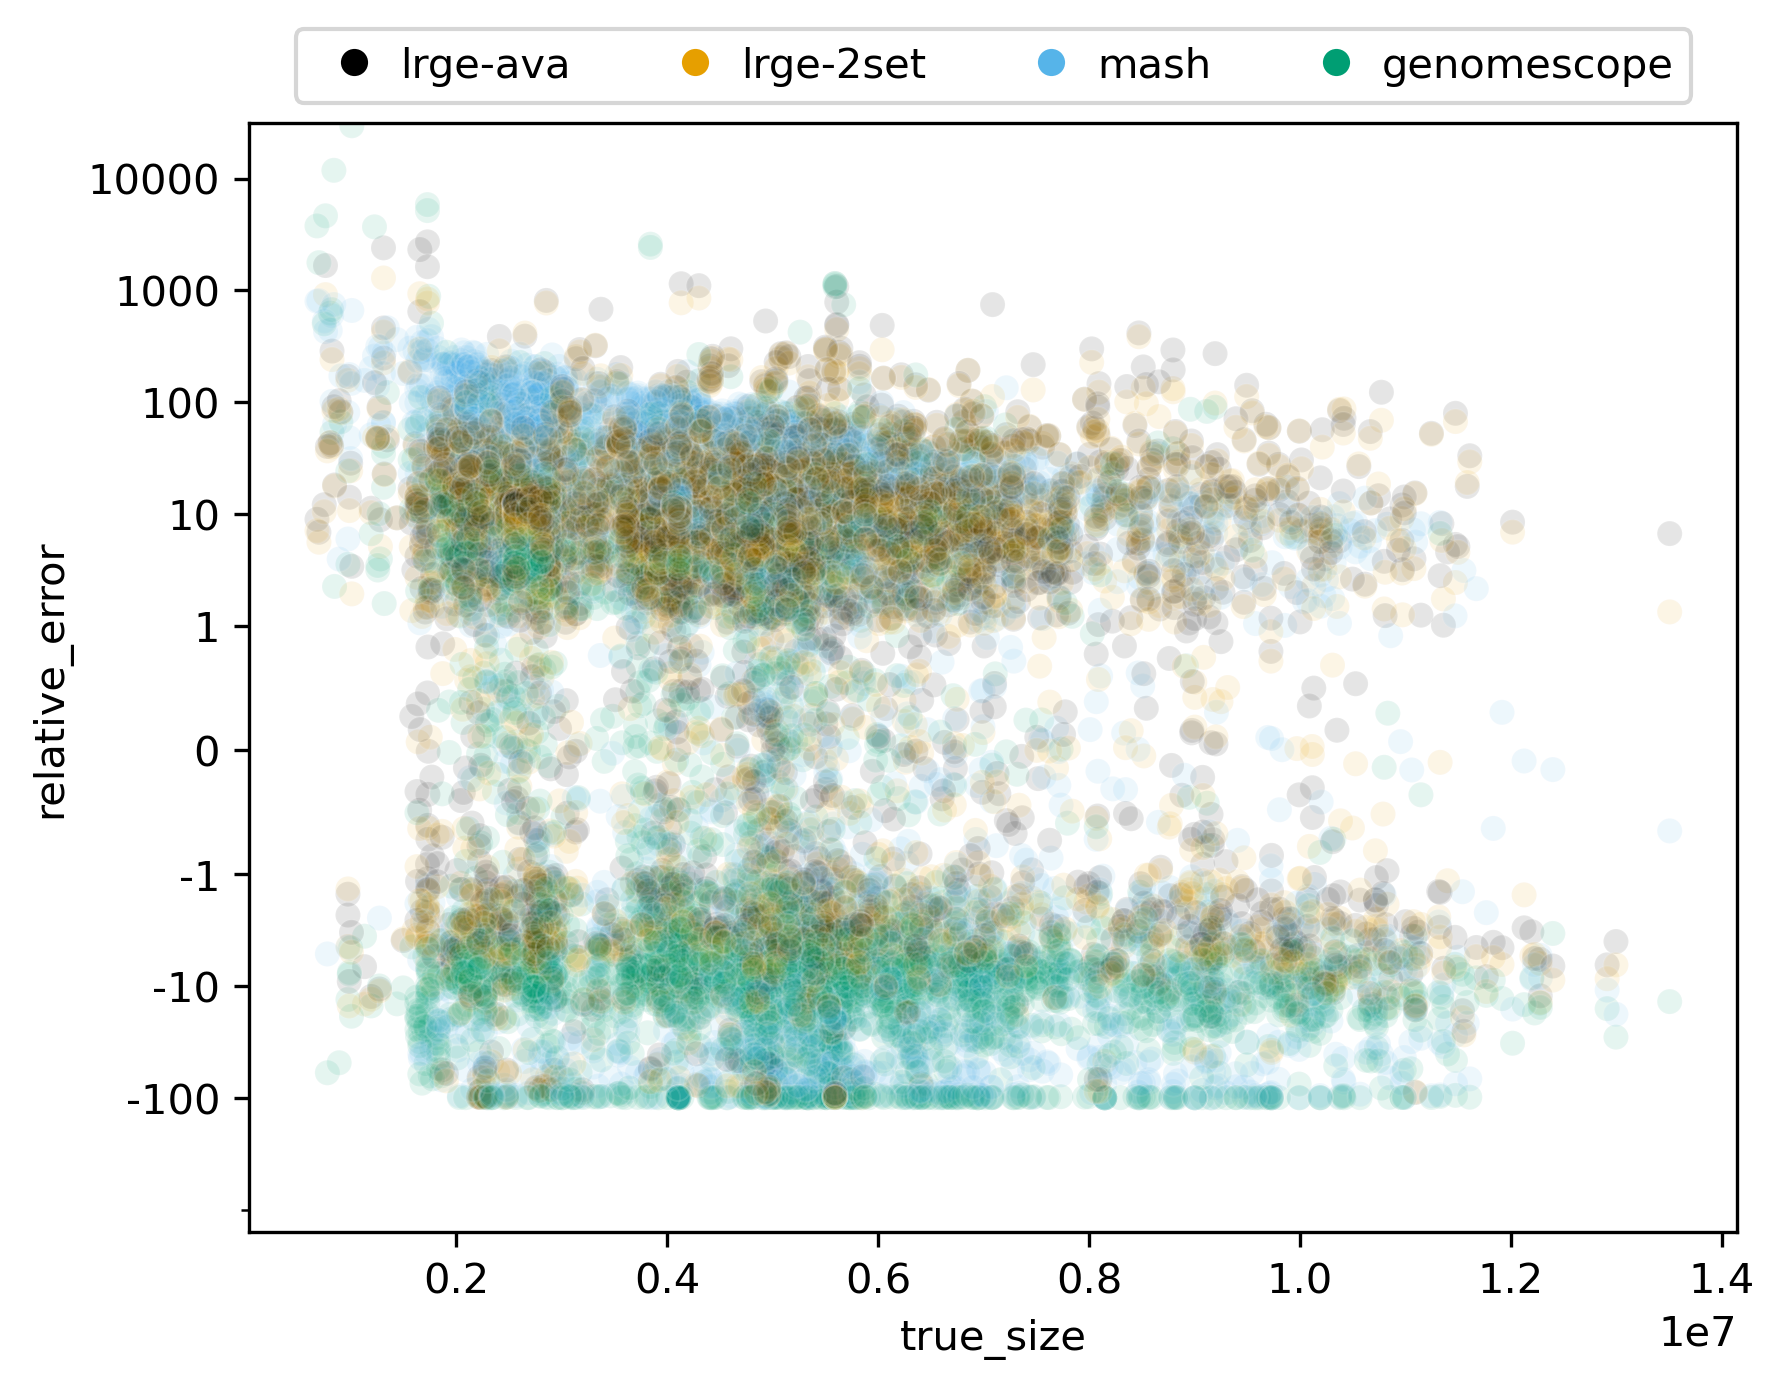

In [9]:
x = "true_size"
y = "relative_error"
style = "platform"
hue = "method"
data = df
fig, ax = plt.subplots(dpi=300)
sns.scatterplot(x=x, y=y, hue=hue, data=data, ax=ax, alpha=0.1, palette=cud_palette)
yticks = [-100, -10, -1, 0, 1, 10, 100, 1000, 10000]
ax.set_yscale("symlog", linthresh=1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

# make the markers larger and less transparent in the legend
handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_markersize(7)
    handle.set_alpha(1)

ax.legend(
    handles,
    labels,
    loc="lower center",
    bbox_to_anchor=(0.5, 1),
    ncol=4,
    title="",
    alignment="center",
    handletextpad=0.1,
)

In [10]:
df.groupby(["method", "platform"])["abs_relative_error"].describe()

count       mean         std       min  \
method      platform                                                   
genomescope OXFORD_NANOPORE  2508.0  47.322070  674.669503  0.002712   
            PACBIO_SMRT       957.0  30.010156  119.864180  0.010475   
lrge-2set   OXFORD_NANOPORE  2508.0  14.340773   45.779145  0.002785   
            PACBIO_SMRT       957.0  38.374576   71.393626  0.010580   
lrge-ava    OXFORD_NANOPORE  2508.0  16.931233   91.172848  0.001718   
            PACBIO_SMRT       957.0  44.931095  119.133951  0.001921   
mash        OXFORD_NANOPORE  2508.0  43.853153   61.024470  0.002574   
            PACBIO_SMRT       957.0  35.585541   44.969044  0.001583   

                                   25%        50%        75%           max  
method      platform                                                        
genomescope OXFORD_NANOPORE   4.768349   8.466745  15.875091  29701.234129  
            PACBIO_SMRT       2.804458   6.399239  26.969096   2590.665705  
lrge-2set   OXFORD_NANOPORE   2.634456   5.863666  12.511359   1292.025368  
            PACBIO_SMRT       9.853853  18.287089  40.243755    933.540755  
lrge-ava    OXFORD_NANOPORE   2.535782   5.779528  12.375092   2716.444118  
            PACBIO_SMRT      11.195753  18.858685  40.310717   2319.778867  
mash        OXFORD_NANOPORE   6.850385  24.682718  61.453303    809.168946  
            PACBIO_SMRT       4.290932  15.378230  55.887939    316.071620

In [11]:
# do an ANOVA to test if the means are different for the different methods on each platform

# this list will contain the results of the Tukey HSD test for those platforms where the ANOVA test is significant
# the format of each element is ((hue, x), (hue, x), pval) where the first two elements are the pairs of means that are
# significantly different and the third element is the p-value of the test
annotations = []

for platform in df["platform"].unique():
    print(f"{'=' * 30}\nPlatform: {platform}\n{'=' * 30}")
    for method in df["method"].unique():
        # print(f"Method: {method}")
        data = df[(df["platform"] == platform) & (df["method"] == method)]["abs_relative_error"]
        # print(data.describe())
    f, p = f_oneway(
        *[df[(df["platform"] == platform) & (df["method"] == method)]["abs_relative_error"] for method in df["method"].unique()]
    )
    print(f"ANOVA: f={f}, p={p}")
    if p < 0.05:
        print("Means are significantly different")
        tukey = pairwise_tukeyhsd(
            df[(df["platform"] == platform)]["abs_relative_error"], df[(df["platform"] == platform)]["method"]
        )
        print(tukey.summary())
        for i, tup in enumerate(combinations(tukey.groupsunique, 2)):
            if not tukey.reject[i]:
                continue
            pval = float(tukey.pvalues[i])
            annotations.append(((tup[0], platform), (tup[1], platform), pval))
    else:
        print("Means are not significantly different")

Platform: OXFORD_NANOPORE
ANOVA: f=6.458909447944773, p=0.00023042894129927997
Means are significantly different
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2  meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
genomescope lrge-2set -32.9813 0.0036 -57.8352 -8.1274   True
genomescope  lrge-ava -30.3908 0.0091 -55.2447  -5.537   True
genomescope      mash  -3.4689 0.9842 -28.3228 21.3849  False
  lrge-2set  lrge-ava   2.5905 0.9933 -22.2634 27.4443  False
  lrge-2set      mash  29.5124 0.0122   4.6585 54.3662   True
   lrge-ava      mash  26.9219 0.0276   2.0681 51.7758   True
-------------------------------------------------------------
Platform: PACBIO_SMRT
ANOVA: f=4.128709664517633, p=0.006223996665235567
Means are significantly different
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2  meandiff p-adj   lower    upper  reject
------------------------------------

In [12]:
def pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    else:
        return "ns"

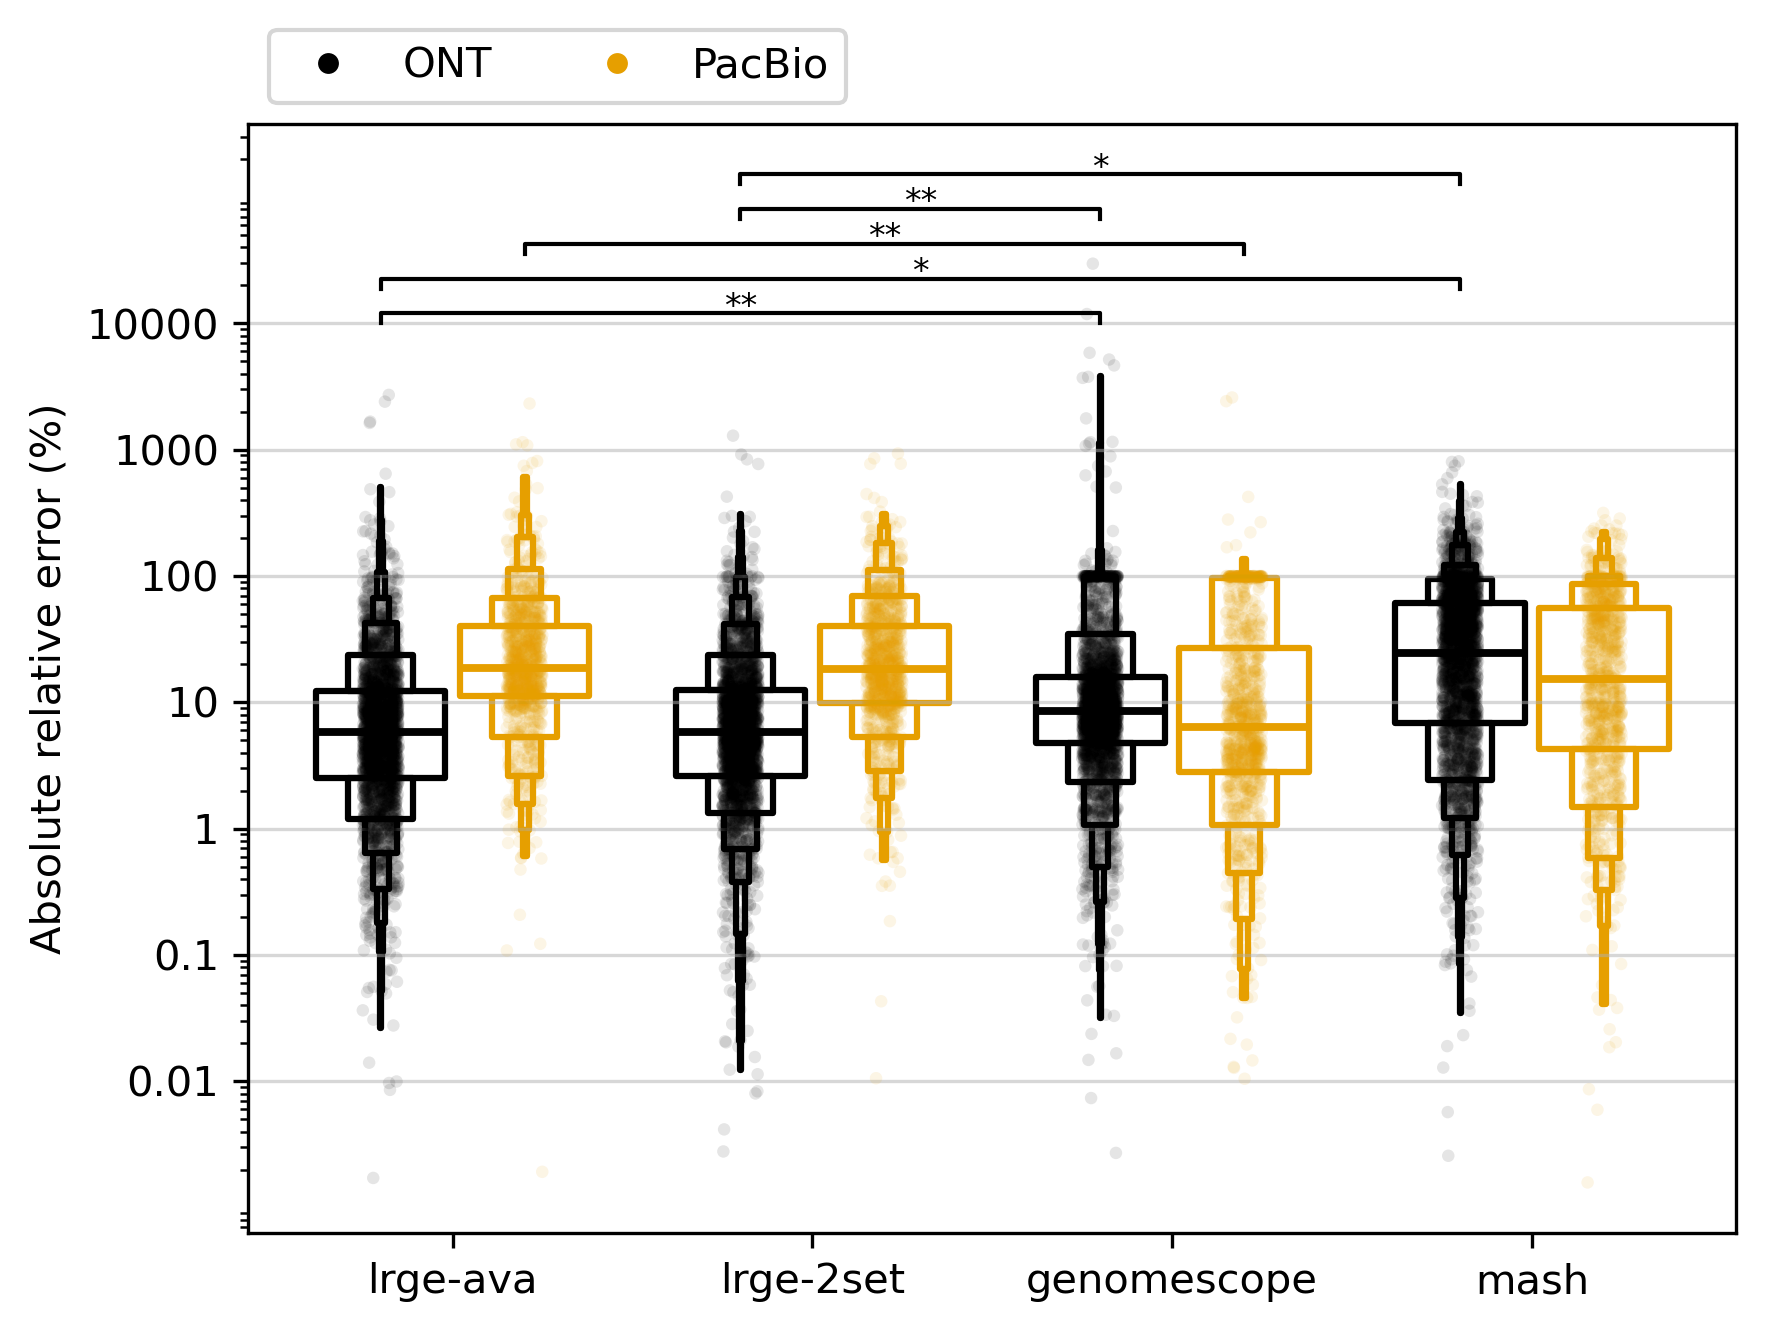

In [13]:
fig, ax = plt.subplots(dpi=300)
x = "method"
y = "abs_relative_error"
hue = "platform"
data = df

order = ["lrge-ava", "lrge-2set", "genomescope", "mash"]
hue_order = sorted(data[hue].unique())

sns.stripplot(
    x=x,
    y=y,
    hue=hue,
    data=data,
    ax=ax,
    dodge=True,
    alpha=0.1,
    jitter=0.1,
    order=order,
    hue_order=hue_order,
    size=3,
)
sns.boxenplot(
    x=x,
    y=y,
    hue=hue,
    data=data,
    ax=ax,
    fill=False,
    showfliers=False,
    gap=0.1,
    legend=False,
    order=order,
    hue_order=hue_order,
)

ax.set_yscale("log")
yticks = [0.01, 0.1, 1, 10, 100, 1000, 10000]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

# statistical annotations
args = []
for i, ((m1, platform), (m2, _), pval) in enumerate(annotations):
    m1_x = order.index(m1)
    m2_x = order.index(m2)
    platform_ix = hue_order.index(platform)
    offset = -0.2 if platform_ix == 0 else 0.2
    x1, x2 = sorted([m1_x + offset, m2_x + offset])

    col = "black"
    annot = pvalue_to_asterisks(pval)

    args.append((x1, x2, col, annot))

annot_ys = np.logspace(4, 5.1, num=len(annotations), base=10)
for i, (x1, x2, col, annot) in enumerate(sorted(args)):
    bracket_y = annot_ys[i]
    h = 0.2 * bracket_y
    ax.plot(
        [x1, x1, x2, x2],
        [bracket_y, bracket_y + h, bracket_y + h, bracket_y],
        lw=1,
        c=col,
    )
    ax.text((x1 + x2) * 0.5, bracket_y, annot, ha="center", va="bottom", color=col, fontsize=8)


# make the markers larger and less transparent in the legend
handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_markersize(5)
    handle.set_alpha(1)

labels = [label_mapping.get(label, label) for label in labels]

ax.legend(
    handles,
    labels,
    loc="lower left",
    bbox_to_anchor=(0, 1),
    ncol=2,
    title="",
    alignment="center",
)
ax.set_ylabel("Absolute relative error (%)")
ax.set_xlabel("")
# turn on y-axis grid
ax.yaxis.grid(True)
# increase the transparency of the grid
ax.yaxis.grid(alpha=0.5)

Plot the run time and memory usage

In [14]:
import re

def parse_time(time_str):
    # Define unit multipliers in seconds
    unit_multipliers = {'d': 86400, 'h': 3600, 'm': 60, 's': 1}
    total_seconds = 0

    # Find all matches of the format (number)(unit), e.g., 2m, 1h, 30s
    matches = re.findall(r"(\d+)([dhms])", time_str)
    
    for value, unit in matches:
        # Convert value to int and multiply by the appropriate unit multiplier
        total_seconds += int(value) * unit_multipliers[unit]
    
    return total_seconds

# Examples
print(parse_time("2m"))         # Output: 120
print(parse_time("1m 40s"))     # Output: 100
print(parse_time("1h 1m 1s"))   # Output: 3661
print(parse_time("1d 2h"))      # Output: 93600

def format_time(seconds):
    # Define the time units
    units = [("d", 86400), ("h", 3600), ("m", 60), ("s", 1)]
    parts = []

    # Loop through each time unit
    for unit, divisor in units:
        value, seconds = divmod(seconds, divisor)  # Get unit value and remainder
        if value > 0:
            parts.append(f"{value}{unit}")  # Only add non-zero units

    return " ".join(parts) if parts else "0s"  # Return formatted string

# Examples
print(format_time(120))   # Output: "2m"
print(format_time(100))   # Output: "1m 40s"
print(format_time(3661))  # Output: "1h 1m 1s"


120
100
3661
93600
2m
1m 40s
1h 1m 1s


In [41]:
# statistical tests for CPU time across methods - not grouped by platform though
cpu_annotations = []
is_significant = False
for method in df["method"].unique():
    data = df[df["method"] == method]["cpu_time"]
    f, p = f_oneway(*[df[df["method"] == method]["cpu_time"] for method in df["method"].unique()])
    print(f"Method: {method}, ANOVA: f={f}, p={p}")
    is_significant = p < 0.05
if is_significant:
    print("Means are significantly different")
    tukey = pairwise_tukeyhsd(
        df["cpu_time"], df["method"]
    )
    print(tukey.summary())
    for i, tup in enumerate(combinations(tukey.groupsunique, 2)):
        if not tukey.reject[i]:
            continue
        pval = float(tukey.pvalues[i])
        cpu_annotations.append((tup[0], tup[1], pval))
else:
    print("Means are not significantly different")

Method: lrge-ava, ANOVA: f=331.41330466010334, p=7.652673099469199e-208
Method: lrge-2set, ANOVA: f=331.41330466010334, p=7.652673099469199e-208
Method: mash, ANOVA: f=331.41330466010334, p=7.652673099469199e-208
Method: genomescope, ANOVA: f=331.41330466010334, p=7.652673099469199e-208
Means are significantly different
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1     group2   meandiff p-adj    lower    upper   reject
----------------------------------------------------------------
genomescope lrge-2set    2.2309 0.9592   -9.2406  13.7025  False
genomescope  lrge-ava   120.482    0.0  109.0105 131.9536   True
genomescope      mash   17.5728 0.0005    6.1013  29.0444   True
  lrge-2set  lrge-ava  118.2511    0.0  106.7796 129.7226   True
  lrge-2set      mash   15.3419 0.0033    3.8704  26.8134   True
   lrge-ava      mash -102.9092    0.0 -114.3807 -91.4377   True
----------------------------------------------------------------


In [45]:
# statistical tests for memory usage across methods - not grouped by platform though
mem_annotations = []
is_significant = False
for method in df["method"].unique():
    data = df[df["method"] == method]["memory_mb"]
    f, p = f_oneway(*[df[df["method"] == method]["memory_mb"] for method in df["method"].unique()])
    print(f"Method: {method}, ANOVA: f={f}, p={p}")
    is_significant = p < 0.05
if is_significant:
    print("Means are significantly different")
    tukey = pairwise_tukeyhsd(
        df["memory_mb"], df["method"]
    )
    print(tukey.summary())
    for i, tup in enumerate(combinations(tukey.groupsunique, 2)):
        if not tukey.reject[i]:
            continue
        pval = float(tukey.pvalues[i])
        mem_annotations.append((tup[0], tup[1], pval))
else:
    print("Means are not significantly different")

Method: lrge-ava, ANOVA: f=3315.66172984501, p=0.0
Method: lrge-2set, ANOVA: f=3315.66172984501, p=0.0
Method: mash, ANOVA: f=3315.66172984501, p=0.0
Method: genomescope, ANOVA: f=3315.66172984501, p=0.0
Means are significantly different
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1     group2   meandiff  p-adj   lower      upper    reject
-------------------------------------------------------------------
genomescope lrge-2set -4788.2187   0.0 -4915.3415 -4661.0958   True
genomescope  lrge-ava -3395.4595   0.0 -3522.5823 -3268.3366   True
genomescope      mash -2967.0112   0.0  -3094.134 -2839.8883   True
  lrge-2set  lrge-ava  1392.7592   0.0  1265.6364  1519.8821   True
  lrge-2set      mash  1821.2075   0.0  1694.0847  1948.3304   True
   lrge-ava      mash   428.4483   0.0   301.3254   555.5711   True
-------------------------------------------------------------------


In [15]:
df["memory_bytes"] = df["memory_mb"].apply(lambda x: x * 1024 * 1024)

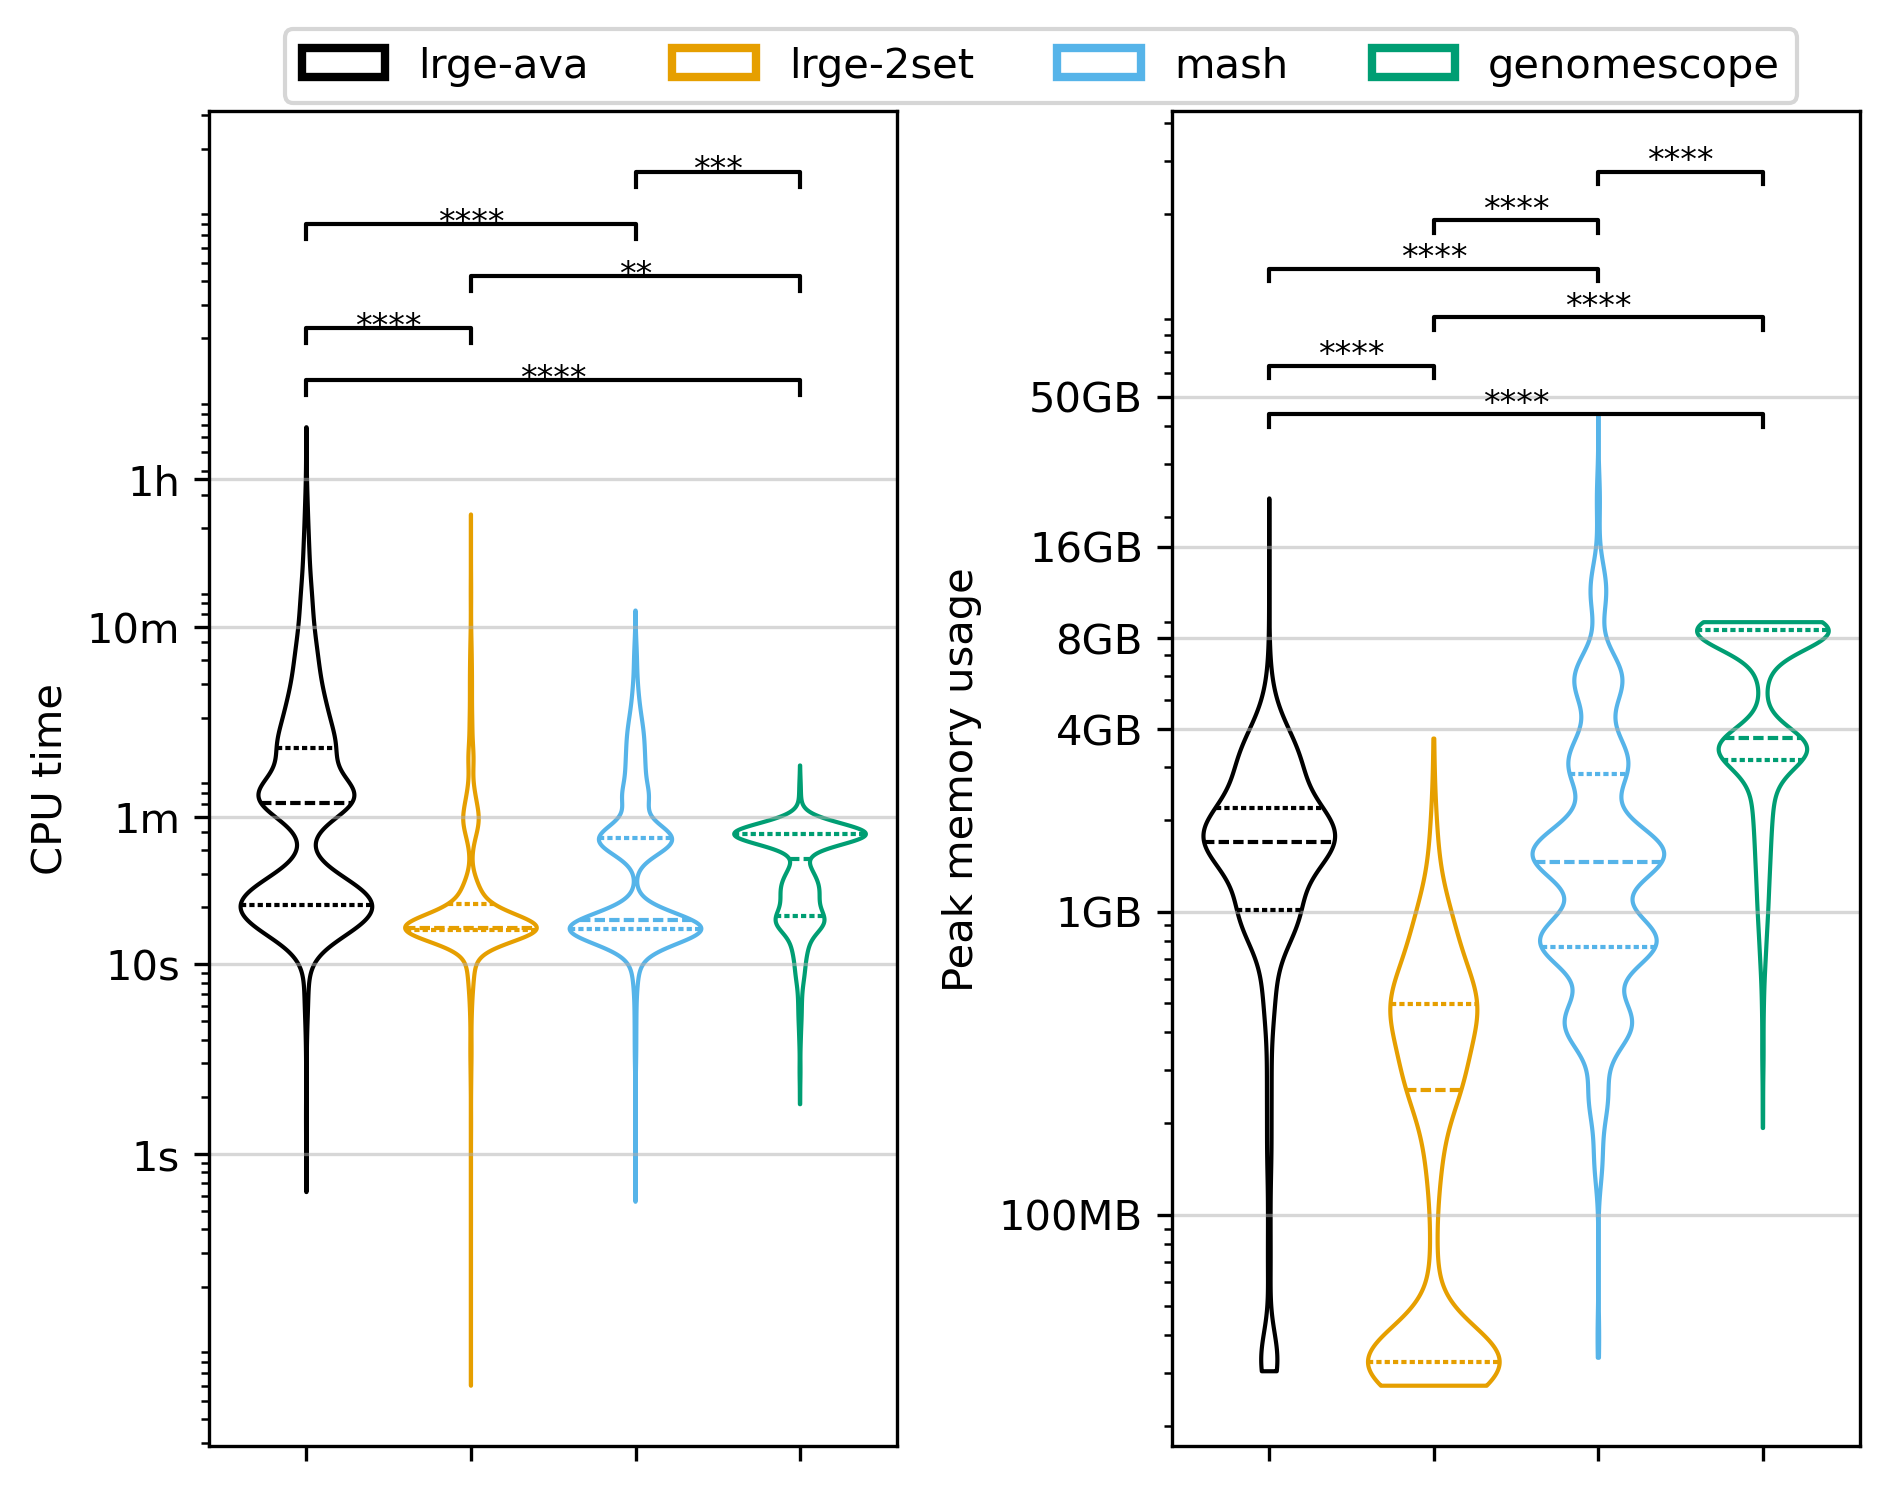

In [65]:
fig, axes = plt.subplots(dpi=300, ncols=2)
lw = 1
x = "method"
hue = x
y = "cpu_time"

cpu_ax = axes[0]
mem_ax = axes[1]

# sns.boxenplot(x=x, y=y, data=df, ax=cpu_ax, hue=y, fill=False, lw=lw, showfliers=False)
# sns.stripplot(x=x, y=y, data=df, ax=cpu_ax, hue=y, alpha=0.1, jitter=0.1)
sns.violinplot(x=x, y=y, data=df, ax=cpu_ax, hue=hue, fill=False, density_norm="width", cut=0, log_scale=True, gridsize=1000, inner="quart", linewidth=lw, legend=True)

y = "memory_bytes"
# sns.boxenplot(x=x, y=y, data=df, ax=mem_ax, hue=y, fill=False, lw=lw, showfliers=False)
sns.violinplot(x=x, y=y, data=df, ax=mem_ax, hue=hue, fill=False, density_norm="width", cut=0, log_scale=True, gridsize=1000, inner="quart", linewidth=lw)
# sns.stripplot(x=x, y=y, data=df, ax=mem_ax, hue=y, alpha=0.1, jitter=0.05)

# cpu_ax.set_xscale("log")
cpu_xticklabels = ["1s", "10s", "1m", "10m", "1h"]
cpu_xticks = [parse_time(label) for label in cpu_xticklabels]
cpu_ax.set_yticks(cpu_xticks)
cpu_ax.set_yticklabels(cpu_xticklabels)
cpu_ax.set_ylabel("CPU time")
cpu_ax.set_xlabel("")
# rotate the x-axis labels
cpu_ax.set_xticklabels([])
# turn on y-axis grid
cpu_ax.yaxis.grid(True)
# increase the transparency of the grid
cpu_ax.yaxis.grid(alpha=0.5)

# add stats annotations
args = []
for i, (m1, m2, pval) in enumerate(cpu_annotations):
    x1 = order.index(m1)
    x2 = order.index(m2)
    col = "black"
    annot = pvalue_to_asterisks(pval)
    args.append((x1, x2, col, annot))

annot_ys = np.logspace(4, 5.1, num=len(cpu_annotations), base=10)
for i, (x1, x2, col, annot) in enumerate(sorted(args)):
    bracket_y = annot_ys[i]
    h = 0.2 * bracket_y
    cpu_ax.plot(
        [x1, x1, x2, x2],
        [bracket_y, bracket_y + h, bracket_y + h, bracket_y],
        lw=1,
        c=col,
    )
    cpu_ax.text((x1 + x2) * 0.5, bracket_y, annot, ha="center", va="bottom", color=col, fontsize=8)


# mem_ax.set_xscale("log")
mem_xticklabels = ["10MB", "100MB", "1GB", "4GB", "8GB", "16GB", "50GB"]
mem_xticks = [parse_size(label) for label in mem_xticklabels]
mem_ax.set_yticks(mem_xticks)
mem_ax.set_yticklabels(mem_xticklabels)
mem_ax.set_ylabel("Peak memory usage")
mem_ax.set_xlabel("")
# rotate the x-axis labels
mem_ax.set_xticklabels([])
# turn on y-axis grid
mem_ax.yaxis.grid(True)
# increase the transparency of the grid
mem_ax.yaxis.grid(alpha=0.5)

# add stats annotations
args = []
for i, (m1, m2, pval) in enumerate(mem_annotations):
    x1 = order.index(m1)
    x2 = order.index(m2)
    col = "black"
    annot = pvalue_to_asterisks(pval)
    args.append((x1, x2, col, annot))

annot_ys = np.logspace(10.6, 11.4, num=len(mem_annotations), base=10)
for i, (x1, x2, col, annot) in enumerate(sorted(args)):
    bracket_y = annot_ys[i]
    h = 0.1 * bracket_y
    mem_ax.plot(
        [x1, x1, x2, x2],
        [bracket_y, bracket_y + h, bracket_y + h, bracket_y],
        lw=1,
        c=col,
    )
    mem_ax.text((x1 + x2) * 0.5, bracket_y*1.05, annot, ha="center", va="bottom", color=col, fontsize=8)

# make a figure level legend
handles, labels = cpu_ax.get_legend_handles_labels()
# make the lines in the legend larger
for handle in handles:
    handle.set_linewidth(2)
fig.legend(handles, labels, loc="center", bbox_to_anchor=(0.55, 1), ncol=4, title="", alignment="center")

cpu_ax.legend().remove()

fig.tight_layout()

In [40]:
annotations

[('genomescope', 'lrge-ava', 3.1175062531474396e-13),
 ('genomescope', 'mash', 0.00048328148193976794),
 ('lrge-2set', 'lrge-ava', 3.1175062531474396e-13),
 ('lrge-2set', 'mash', 0.0033148764848668355),
 ('lrge-ava', 'mash', 3.1175062531474396e-13)]